# <u>Sommaire du Notebook :<u>
    

1. <u>__Mise en place du Notebook__<u> :

    
    - Import des Librairies 
    - Import des C.S.V
    
    
2. <u>__Code pour le Notebook__<u> :

    
    - Création de la jointure 
    - Création des listes pour les graphiques
    - Création de calcul pour la fréquence / CA / Probabilité
    
3. <u>__Données Factuelles pour une meilleure visibilité du Notebook__<u> :

    
    - Visu des 3 fichiers C.S.V
    - Imputation par la moyenne
    - Visu de la jointure
    
4. <u>__Differents graphiques de visu pour le Chiffre d'Affaires__<u> :

    
    - Outlier par catégorie (Plotly)
    - CA % par catégorie (pie)
    - Chiffre d'affaire dans le temps toutes catégories confondues (bar)
    - Chiffre d'affaire par catégorie split (bar)
    - Détail de l'erreur du graph ' Chiffre d'affaire par catégorie split' (bar - seaborn)

5. <u>__Input des catégories__<u> :
    

    - Catégorie 0
    - Catégorie 1
    - Catégorie 2
    
6. <u>__Contrôle__<u> :
    

    - Gros client 
    - Histogramme de visualisation
    
7. <u>__Differents graphiques pour les ventes__<u> :
    

    - Les Tops et Flops des Ventes par produits
    - Top Ventes produits par Catégorie
    - Vente par année de naissance des clients

8. <u>__Differentes données pour les clients__<u> :
    

    - Panier client
    - Top 10 des clients
    - Visu du top 4 des clients
    - Pourcentage du CA pour le top 4 des clients
    - Suppression des 4 gros clients 
    
9. <u>__Differentes données pour l'âge__<u> :
    

    - Âge sur le CA graph


10. <u>__Boxplot de corrélation__<u> : 
    

    - Boxplot Âge par catégorie pour une corrélation
    - Boxplot Prix par catégorie pour une corrélation
    - Boxplot Tranche d'âge par prix pour une corrélation



11. <u>__Moyennes Mobiles__<u> :
    

    - Graphique moyenne mobile sur 1 mois et 3 mois
    
12. <u>__Moyenne__<u> :
    

    - Graphique du prix sur l'âge

13. <u>__Test de Shapiro__<u> :
    
    
    - Catégorie 0
    - Catégorie 1
    - Catégorie 2 
    - Toutes les catégories 

14. <u>__Graphique pie avec corrélation__<u> :
    
    
    - CA sur le Sexe
    - CA par tranche d'âge
  

    

## <u> Mise en place du Notebook <u> :

In [1]:
!pip install researchpy

In [87]:
# Importation des Librairies

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import plotly as px
import plotly.graph_objects as go
import seaborn as sns
import statsmodels.api as sm
from scipy.stats import pearsonr
import scipy
import statsmodels.api as sm
from statsmodels.formula.api import ols
import datetime
# import researchpy as rp
import scipy.stats as stats


import sys
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

# Importation des CSV

customers = pd.read_csv('customers.csv') 
products = pd.read_csv('products.csv')
transactions = pd.read_csv('transactions.csv')

# <u>Code pour le Notebook<u> :

In [88]:
# Premiére jointure outer pour transactions et products
Liaison = pd.merge(transactions, products,
                    on = 'id_prod', how = 'outer', indicator = True)
# Seconde jointure inner pour customers et le premier DF
Liaison_2 = pd.merge(customers, Liaison, 
                    on = 'client_id' , how = 'inner')

# Suppression des données contenant "test"
Liaison_2.drop(Liaison_2[Liaison_2['date'].str.contains('test')].index,inplace = True)

# Imputation
# Imputation par la moyenne
for i in Liaison_2[Liaison_2.id_prod == '0_2245' ].index :
    Liaison_2.loc[i,'price'] = 11.727280
Liaison_2[Liaison_2.id_prod == '0_2245' ]
# Uniquement pour la categ 0
for i in Liaison_2[Liaison_2.id_prod == '0_2245' ].index :
    Liaison_2.loc[i, 'categ'] = 0
Liaison_2[Liaison_2.id_prod == '0_2245' ]['price'].sum()

# Outlier par catégorie
xxx = Liaison_2[['price', 'categ']]
xx0 = xxx[xxx.categ == 0]
xx1 = xxx[xxx.categ == 1]
xx2 = xxx[xxx.categ == 2]

# Chiffre d'affaire
CA = Liaison_2[['price' , 'date']]

# CA dans le temps 
Evo = Liaison_2[['date','price']]
Evo['date'] = pd.to_datetime(Evo['date']).dt.date
Evo['Annee'] = Evo.date.apply(lambda x : x.year)
Evo['Mois'] = Evo.date.apply(lambda x : x.month)
Evo['Full'] = Evo.date.apply(lambda x : (str(x.year)) + str('/') + (str(x.month).zfill(2))) # zfill = permet de mettre un 0 devant les mois à 1 chiffre
Evo = Evo.groupby('Full', as_index = False)
Evo = Evo.price.sum()

# List de moyenne des clients
Liaison_2_moyenne = Liaison_2
Liaison_2_moyenne = Liaison_2_moyenne.groupby('client_id', as_index = False).mean()

# CA catégorie par le temps
pd.options.mode.chained_assignment = None
Evolution = Liaison_2[['price', 'date', 'categ']]

Evolution['date'] = pd.to_datetime(Evolution['date']).dt.date
Evolution['Annee'] = Evolution.date.apply(lambda x : x.year)
Evolution['Mois'] = Evolution.date.apply(lambda x : x.month)
Evolution['Full'] = Evolution.date.apply(lambda x : (str(x.year)) + str('/') + (str(x.month).zfill(2))) # zfill = permet de mettre un 0 devant les mois à 1 chiffre

Evolution0 = Evolution[Evolution.categ ==0]
Evolution0 = Evolution0.groupby('Full', as_index = False)
Evolution0 = Evolution0.price.sum()

Evolution1 = Evolution[Evolution.categ ==1]
Evolution1 = Evolution1.groupby('Full', as_index = False)
Evolution1 = Evolution1.price.sum()

Evolution2 = Evolution[Evolution.categ ==2]
Evolution2 = Evolution2.groupby('Full', as_index = False)
Evolution2 = Evolution2.price.sum()

# Soucis du CA catégorie par le temps + explication
Soucis = Liaison_2[['date', 'price', 'categ']]
Soucis = Soucis[Soucis.categ == 1]
Soucis['date'] = pd.to_datetime(Soucis['date']).dt.date
Soucis['annee'] = Soucis.date.apply(lambda x: x.year)
Soucis['mois'] = Soucis.date.apply(lambda x: x.month)
Soucis['jour'] = Soucis.date.apply(lambda x: x.day)
Soucis['annee_mois_jour'] = Soucis.date.apply(lambda x: (str(x.year)) + str('-') + (str(x.month).zfill(2)) + str('-') + (str(x.day).zfill(2)))
Soucis = Soucis.query("annee_mois_jour >= '2021-10-01' and annee_mois_jour <='2021-10-31'")
Soucis = Soucis.sort_values(by = 'annee_mois_jour', ascending = True)
Soucis = Soucis.groupby('annee_mois_jour', as_index = False)
Soucis = round(Soucis.price.sum(),2)

# Zoom des références
Zoom = Liaison_2[['price', 'id_prod', 'categ' , 'date']]

# % CA pie
Chiffre_Affaire = Evolution0.price.sum() + Evolution1.price.sum() + Evolution2.price.sum()
ratio_Evo_0 = round((Evolution0.price.sum()/Chiffre_Affaire)*100,2)
ratio_Evo_1 = round((Evolution1.price.sum()/Chiffre_Affaire)*100,2)
ratio_Evo_2 = round((Evolution2.price.sum()/Chiffre_Affaire)*100,2)

# Panier client 
Panier_Client = round(Chiffre_Affaire / len(Liaison_2.session_id.unique()))

# Top / Flop des ventes par catégorie
Top_ventes = Liaison_2[['id_prod', 'price']]
Top_ventes = Top_ventes.groupby('id_prod', as_index = False).sum()


# Top Ventes par catégorie
# Création Liste pour Catégorie 0
Best_Categ_0 = Liaison[Liaison['categ']== 0]
Best_Categ_0 = Best_Categ_0.groupby('id_prod',as_index = False)
Best_Categ_0 = Best_Categ_0.price.sum()
# Création Liste pour Catégorie 1
Best_Categ_1 = Liaison[Liaison['categ']== 1]
Best_Categ_1 = Best_Categ_1.groupby('id_prod',as_index = False)
Best_Categ_1 = Best_Categ_1.price.sum()
# Création Liste pour Catégorie 2
Best_Categ_2 = Liaison[Liaison['categ']== 2]
Best_Categ_2 = Best_Categ_2.groupby('id_prod',as_index = False)
Best_Categ_2 = Best_Categ_2.price.sum()

# Liste pour ventes par catégorie
ZOOM_PRIX = Zoom.price
ZOOM_CATEG = Zoom.categ

# Vente par année de naissance des clients
Liste_année_naissance = Liaison_2[['price', 'birth']]
Liste_année_naissance = Liste_année_naissance.groupby('birth', as_index= False)
Liste_année_naissance = Liste_année_naissance.price.sum()

# Top 10 clients
Top_clients = Liaison_2[['client_id' , 'price']]
Top_clients = Top_clients.groupby('client_id').sum()

# Top 4 
Top4 = Liaison_2[ (Liaison_2['client_id'] == 'c_1609') 
                      | (Liaison_2['client_id'] == 'c_4958') 
                      | (Liaison_2['client_id'] == 'c_6714')
                      | (Liaison_2['client_id'] == 'c_3454')]

# % du CA pour le top 4
top4_pourcentage = Top4
top4_pourcentage = round((top4_pourcentage.price.sum() / Chiffre_Affaire)*100,2)
top4_pourcentage

#Création des tranches d'ages
Liaison_2.loc[Liaison_2['birth']<1949,'tranche'] = 'tranche70_90'
Liaison_2.loc[(Liaison_2['birth']> 1949) & (Liaison_2['birth'] <1969),'tranche'] = 'tranche50_70'
Liaison_2.loc[(Liaison_2['birth']> 1969) & (Liaison_2['birth'] <1989),'tranche'] = 'tranche30_50'
Liaison_2.loc[(Liaison_2['birth']> 1989) & (Liaison_2['birth'] <1999),'tranche'] = 'tranche20_30'
Liaison_2.loc[(Liaison_2['birth']> 1999) ,'tranche'] = 'tranche_moins_de_20'

#création du DF de la tranche d'âge
Liaison_2_tranche = Liaison_2 [['price', 'tranche','categ']]
#calcul du CA par tranche
#tranche70_90
tranche70_90 = Liaison_2[Liaison_2.tranche == 'tranche70_90']
tranche70_90 = tranche70_90.groupby('tranche', as_index = False)
tranche70_90 = tranche70_90.price.sum()
# tranche50_70
tranche50_70 = Liaison_2[Liaison_2.tranche == 'tranche50_70']
tranche50_70 = tranche50_70.groupby('tranche', as_index = False)
tranche50_70 = tranche50_70.price.sum()
# tranche30_50
tranche30_50 = Liaison_2[Liaison_2.tranche == 'tranche30_50']
tranche30_50 = tranche30_50.groupby('tranche', as_index = False)
tranche30_50= tranche30_50.price.sum()
tranche30_50_categ_0 = Liaison_2[Liaison_2.categ ==0]
tranche30_50_categ_1 = Liaison_2[Liaison_2.categ ==1]
tranche30_50_categ_2 = Liaison_2[Liaison_2.categ ==2]
# tranche20_30
tranche20_30 = Liaison_2[Liaison_2.tranche == 'tranche20_30']
tranche20_30 = tranche20_30.groupby('tranche', as_index = False)
tranche20_30 = tranche20_30.price.sum()
tranche20_30 = Liaison_2[Liaison_2.categ ==0]
tranche20_30 = Liaison_2[Liaison_2.categ ==1]
tranche20_30 = Liaison_2[Liaison_2.categ ==2]
# tranche_moins_de_20
tranche_moins_de_20 = Liaison_2[Liaison_2.tranche == 'tranche_moins_de_20']
tranche_moins_de_20 = tranche_moins_de_20.groupby('tranche', as_index = False)
tranche_moins_de_20 = tranche_moins_de_20.price.sum()
tranche_moins_de_20 = Liaison_2[Liaison_2.categ ==0]
tranche_moins_de_20 = Liaison_2[Liaison_2.categ ==1]
tranche_moins_de_20 = Liaison_2[Liaison_2.categ ==2]

# Age sur le CA
TEST = Liaison_2.groupby(['tranche', 'categ']).agg(CA=('price', 'sum'))
Couleur = ['r','g','b','r','g','b','r','g','b']

# Fréquence d'achat par minute
# Ajout d'une variable pour la fréquence d'Achat
Frequence = Liaison_2[['session_id','categ']]
# Détails du calcul pour la fréquence d'Achat sur 2 ans
Frequence = round(((365*24)*60)*2 / Frequence.session_id.count(),2)


#Calcul de proba
# 2_159
PROBABILITE = Liaison_2.loc[Liaison_2["id_prod"] == "2_159"]
# nunique
XOR  = PROBABILITE.client_id.nunique()
#jointure
PROBA = pd.merge(Liaison_2, PROBABILITE,
                 left_on = "client_id", right_on = "client_id" ,how = "inner")
# nunique
YOR = PROBA[PROBA.id_prod_x == "0_525"].client_id.nunique()

# calcul proba
XX = round((YOR / XOR) * 100,2)

# Taille des figures Seaborn
sns.set(rc={'figure.figsize':(11.7,8.27)})

# Moyenne Mobile 
moyenne = Liaison_2[['date', 'price']]
moyenne['price']
moyenne['date']


moyenne['date'] = pd.to_datetime(moyenne['date']).dt.date
moyenne['annee'] = moyenne.date.apply(lambda x: x.year)
moyenne['mois'] = moyenne.date.apply(lambda x: x.month)
moyenne['jour'] = moyenne.date.apply(lambda x: x.day)
moyenne['annee_mois_jour'] = moyenne.date.apply(lambda x: (str(x.year)) + str('-') + (str(x.month).zfill(2)) + str('-') + (str(x.day).zfill(2)))
moyenne = moyenne.groupby('annee_mois_jour', as_index = False)
moyenne = moyenne.price.sum()
moyenne.sort_values(by = 'annee_mois_jour', ascending = True)

# Rolling de la moyenne mobile
moyenne_mobile = moyenne[['annee_mois_jour','price']]
moyenne_mobile= moyenne_mobile.groupby('annee_mois_jour').sum()
moyenne_mobile['1_mois'] = moyenne_mobile.price.rolling(window = 30, min_periods = 1).mean() 
moyenne_mobile['3_mois'] = moyenne_mobile.price.rolling(window = 90, min_periods = 1).mean() 

# <u>Données Factuelles pour une meilleure visibilité du Notebook<u> :

### Visu Customers 

In [89]:
# Head
customers.head()

,client_id,sex,birth
0,c_4410,f,1967
1,c_7839,f,1975
2,c_1699,f,1984
3,c_5961,f,1962
4,c_5320,m,1943


In [90]:
# Describe
customers.describe()

,birth
count,8623.000000
mean,1978.280877
std,16.919535
min,1929.000000
25%,1966.000000
50%,1979.000000
75%,1992.000000
max,2004.000000


In [7]:
# Shape
customers.shape

(8623, 3)

In [8]:
# Len Unique
len(customers.client_id.unique())

8623

### Visu Products

In [10]:
# head
products.head()

,id_prod,price,categ
0,0_1421,19.99,0
1,0_1368,5.13,0
2,0_731,17.99,0
3,1_587,4.99,1
4,0_1507,3.99,0


In [11]:
# Describe
products.describe()

,price,categ
count,3287.000000,3287.000000
mean,21.856641,0.370246
std,29.847908,0.615387
min,-1.000000,0.000000
25%,6.990000,0.000000
50%,13.060000,0.000000
75%,22.990000,1.000000
max,300.000000,2.000000


In [12]:
# Len Unique
len(products.id_prod.unique())

3287

In [13]:
# Shape
products.shape

(3287, 3)

T_0 = Données abbérantes à corriger / fixer

In [14]:
# Prix abberant T_0 car négatif
products[products.price < 0 ]

,id_prod,price,categ
731,T_0,-1.0,0


### Visu Transactions

In [15]:
# Head
transactions.head()

,id_prod,date,session_id,client_id
0,0_1518,2022-05-20 13:21:29.043970,s_211425,c_103
1,1_251,2022-02-02 07:55:19.149409,s_158752,c_8534
2,0_1277,2022-06-18 15:44:33.155329,s_225667,c_6714
3,2_209,2021-06-24 04:19:29.835891,s_52962,c_6941
4,0_1509,2023-01-11 08:22:08.194479,s_325227,c_4232


Données test pour le moins étrange à corriger / fixer et vérifier à quoi elles correspondent

In [16]:
# Describe
transactions.describe()

,id_prod,date,session_id,client_id
count,679532,679532,679532,679532
unique,3267,679371,342316,8602
top,1_369,test_2021-03-01 02:30:02.237413,s_0,c_1609
freq,2252,13,200,25488


In [17]:
# Len Unique pour les client_id
len(transactions.client_id.unique())

8602

Test = T_0 donc données abbérantes à drop pour la suite

In [18]:
# Valeur TEST T_0
transactions[transactions[('date')].str.contains('test')]

,id_prod,date,session_id,client_id
3019,T_0,test_2021-03-01 02:30:02.237419,s_0,ct_0
5138,T_0,test_2021-03-01 02:30:02.237425,s_0,ct_0
9668,T_0,test_2021-03-01 02:30:02.237437,s_0,ct_1
10728,T_0,test_2021-03-01 02:30:02.237436,s_0,ct_0
15292,T_0,test_2021-03-01 02:30:02.237430,s_0,ct_0
...,...,...,...,...
657830,T_0,test_2021-03-01 02:30:02.237417,s_0,ct_0
662081,T_0,test_2021-03-01 02:30:02.237427,s_0,ct_1
670680,T_0,test_2021-03-01 02:30:02.237449,s_0,ct_1
671647,T_0,test_2021-03-01 02:30:02.237424,s_0,ct_1


erreur de référencement client 0_2245 à faire une imputation sur la moyenne des prix

In [20]:
# client par catégorie
Liaison_2.groupby(['client_id', 'categ']).count()

sex  birth  id_prod  date  session_id  price  _merge  tranche
client_id categ                                                               
c_1       0.0     30     30       30    30          30     30      30       30
          1.0      8      8        8     8           8      8       8        8
          2.0      1      1        1     1           1      1       1        1
c_10      0.0     20     20       20    20          20     20      20       20
          1.0     34     34       34    34          34     34      34       34
...              ...    ...      ...   ...         ...    ...     ...      ...
c_998     0.0     14     14       14    14          14     14      14       14
          1.0     11     11       11    11          11     11      11       11
          2.0     28     28       28    28          28     28      28       28
c_999     0.0     19     19       19    19          19     19      19       19
          1.0     27     27       27    27          27     27      27       27

[19946 rows x 8 columns]

Corresponds au fichier avant les données supprimés pour T_0

In [21]:
# Client particulier gros client + prix négatif ?
Liaison.groupby(['id_prod']).sum().describe()

,price,categ
count,3288.000000,3288.000000
mean,3605.329672,91.284367
std,7352.233364,290.459607
min,-200.000000,0.000000
25%,226.262500,0.000000
50%,779.950000,0.000000
75%,3375.057500,16.000000
max,94893.500000,2252.000000


### Imputation par la moyenne 

In [22]:
# Vérif des prix uniques nan ??
Liaison[Liaison._merge != 'both'].price.unique()

array([   nan,  35.06,   1.67,  20.08,   2.99,   1.15,  31.82,  20.92,
        22.05,   0.8 ,  24.99, 220.99,  39.73, 141.32,   1.94,  24.5 ,
       132.36,  22.99,  23.66,  20.28])

Avant modification du client 0_2245

In [23]:
# Vérif des données nan
Liaison[Liaison.price.isna()]

,id_prod,date,session_id,client_id,price,categ,_merge
542560,0_2245,2022-09-23 07:22:38.636773,s_272266,c_4746,NaN,NaN,left_only
542561,0_2245,2022-07-23 09:24:14.133889,s_242482,c_6713,NaN,NaN,left_only
542562,0_2245,2022-12-03 03:26:35.696673,s_306338,c_5108,NaN,NaN,left_only
542563,0_2245,2021-08-16 11:33:25.481411,s_76493,c_1391,NaN,NaN,left_only
542564,0_2245,2022-07-16 05:53:01.627491,s_239078,c_7954,NaN,NaN,left_only
...,...,...,...,...,...,...,...
542776,0_2245,2021-08-25 09:06:03.504061,s_80395,c_131,NaN,NaN,left_only
542777,0_2245,2022-03-06 19:59:19.462288,s_175311,c_4167,NaN,NaN,left_only
542778,0_2245,2022-05-16 11:35:20.319501,s_209381,c_4453,NaN,NaN,left_only
542779,0_2245,2022-02-11 09:05:43.952857,s_163405,c_1098,NaN,NaN,left_only


Aprés modification du client 0_2245

In [24]:
Top_ventes[Top_ventes['id_prod']== '0_2245']

,id_prod,price
1375,0_2245,2591.72888


In [25]:
# Moyenne des produits dans les categ
products.groupby('categ').sum().mean()

price    23947.593333
dtype: float64

### Visu de la jointure

In [26]:
# Visu du DF 
Liaison_2

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge,tranche
0,c_4410,f,1967,0_1277,2022-03-25 00:03:39.156997,s_184041,7.99,0.0,both,tranche50_70
1,c_4410,f,1967,0_1277,2021-09-25 00:03:39.156997,s_94984,7.99,0.0,both,tranche50_70
2,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0.0,both,tranche50_70
3,c_4410,f,1967,0_1376,2022-04-24 22:58:27.418343,s_198987,16.24,0.0,both,tranche50_70
4,c_4410,f,1967,0_1376,2023-01-24 22:58:27.418343,s_331878,16.24,0.0,both,tranche50_70
...,...,...,...,...,...,...,...,...,...,...
679527,c_84,f,1982,0_1452,2021-09-20 10:11:35.510099,s_92701,13.77,0.0,both,tranche30_50
679528,c_84,f,1982,0_1110,2021-09-20 10:38:29.498994,s_92701,4.71,0.0,both,tranche30_50
679529,c_84,f,1982,0_1399,2021-10-01 16:13:18.997813,s_98493,17.99,0.0,both,tranche30_50
679530,c_84,f,1982,1_110,2021-09-13 21:39:46.845376,s_89478,54.90,1.0,both,tranche30_50


Contrôle que tout les test ont été effacés

In [27]:
# Que de la catégorie 0 avec prix négatif toutes des dates similaires
Liaison_2[Liaison_2['date'].str.contains('test')]

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge,tranche


In [28]:
# Visu du merge _both pour 'both' only 
Liaison_2[Liaison_2._merge == 'both']

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge,tranche
0,c_4410,f,1967,0_1277,2022-03-25 00:03:39.156997,s_184041,7.99,0.0,both,tranche50_70
1,c_4410,f,1967,0_1277,2021-09-25 00:03:39.156997,s_94984,7.99,0.0,both,tranche50_70
2,c_4410,f,1967,0_1376,2021-09-24 22:58:27.418343,s_94984,16.24,0.0,both,tranche50_70
3,c_4410,f,1967,0_1376,2022-04-24 22:58:27.418343,s_198987,16.24,0.0,both,tranche50_70
4,c_4410,f,1967,0_1376,2023-01-24 22:58:27.418343,s_331878,16.24,0.0,both,tranche50_70
...,...,...,...,...,...,...,...,...,...,...
679527,c_84,f,1982,0_1452,2021-09-20 10:11:35.510099,s_92701,13.77,0.0,both,tranche30_50
679528,c_84,f,1982,0_1110,2021-09-20 10:38:29.498994,s_92701,4.71,0.0,both,tranche30_50
679529,c_84,f,1982,0_1399,2021-10-01 16:13:18.997813,s_98493,17.99,0.0,both,tranche30_50
679530,c_84,f,1982,1_110,2021-09-13 21:39:46.845376,s_89478,54.90,1.0,both,tranche30_50


# <u>Outlier par catégorie<u> :

De nombreux outliers mais rien d'abberant

In [91]:
"""# Création d'un DF pour plotly
fig = go.Figure()
# Création de 3 boxplot different en fonction des categ
fig.add_trace(go.Box(y = xx0.price,
                     x = xx0.categ,
                     name = 'categorie 0',
                     marker_color = 'Green'))
fig.add_trace(go.Box(y = xx1.price,
                     x = xx1.categ,
                     name = 'categorie 1',
                     marker_color = 'DarkSlateGrey'))
fig.add_trace(go.Box(y = xx2.price,
                     x = xx2.categ,
                     name = 'categorie 2',
                     marker_color = 'Blue'))"""

"# Création d'un DF pour plotly\nfig = go.Figure()\n# Création de 3 boxplot different en fonction des categ\nfig.add_trace(go.Box(y = xx0.price,\n                     x = xx0.categ,\n                     name = 'categorie 0',\n                     marker_color = 'Green'))\nfig.add_trace(go.Box(y = xx1.price,\n                     x = xx1.categ,\n                     name = 'categorie 1',\n                     marker_color = 'DarkSlateGrey'))\nfig.add_trace(go.Box(y = xx2.price,\n                     x = xx2.categ,\n                     name = 'categorie 2',\n                     marker_color = 'Blue'))"

# <u>CA % par catégorie<u> :

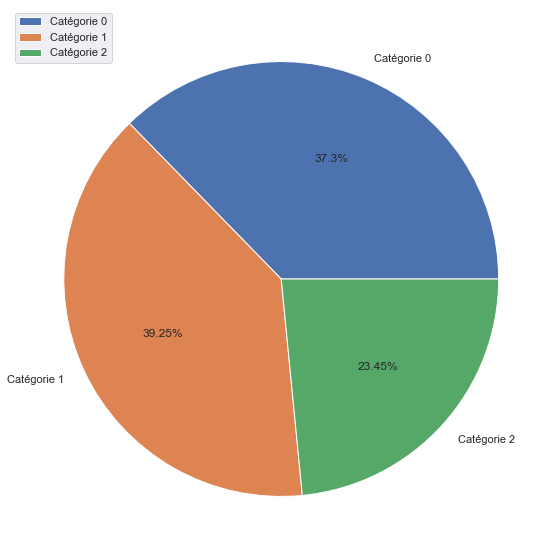

In [94]:
# Utilisation DF pour un plot.pie
plt.figure(figsize = (10, 10))
# utilisation des 3 DF 
x = [ratio_Evo_0, ratio_Evo_1, ratio_Evo_2]
plt.pie(x, labels = ['Catégorie 0', 'Catégorie 1', 'Catégorie 2'], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
plt.legend()
plt.show()

# Chiffre d'affaires

In [95]:
# print du résultat du CA
print('Le résultat du CA est de',CA['price'].sum(),'€')

Le résultat du CA est de 11856320.40888 €


# CA dans le temps

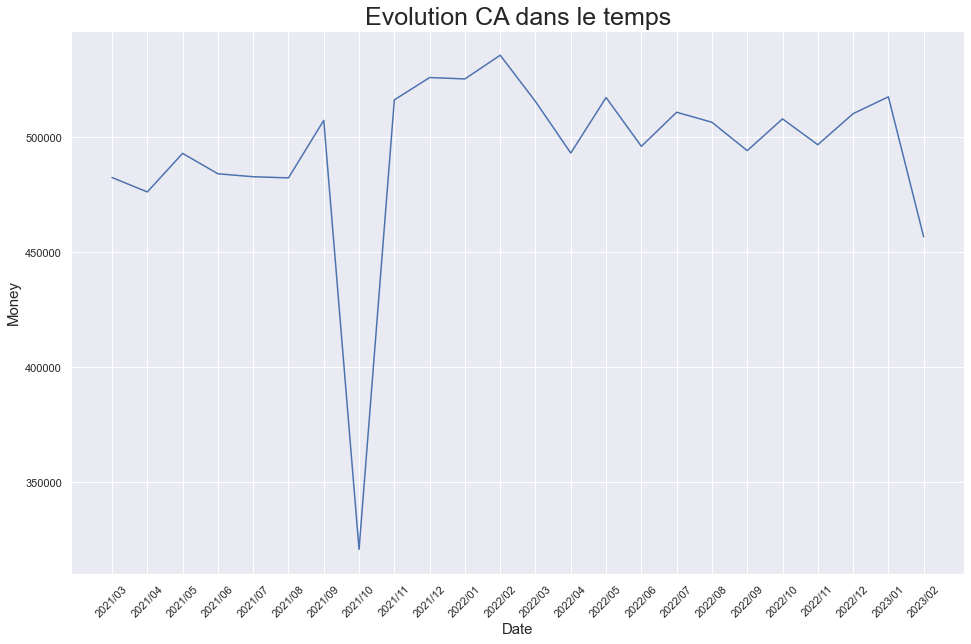

In [98]:
x = Evo.Full
y = Evo.price
plt.figure(figsize= (16,10))
plt.plot(x, y)
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Money', fontsize = 15)
plt.title(' Evolution CA dans le temps ', fontsize = 25)
plt.xticks(rotation = 45)

plt.grid(True)

plt.show()

# CA catégorie par le temps

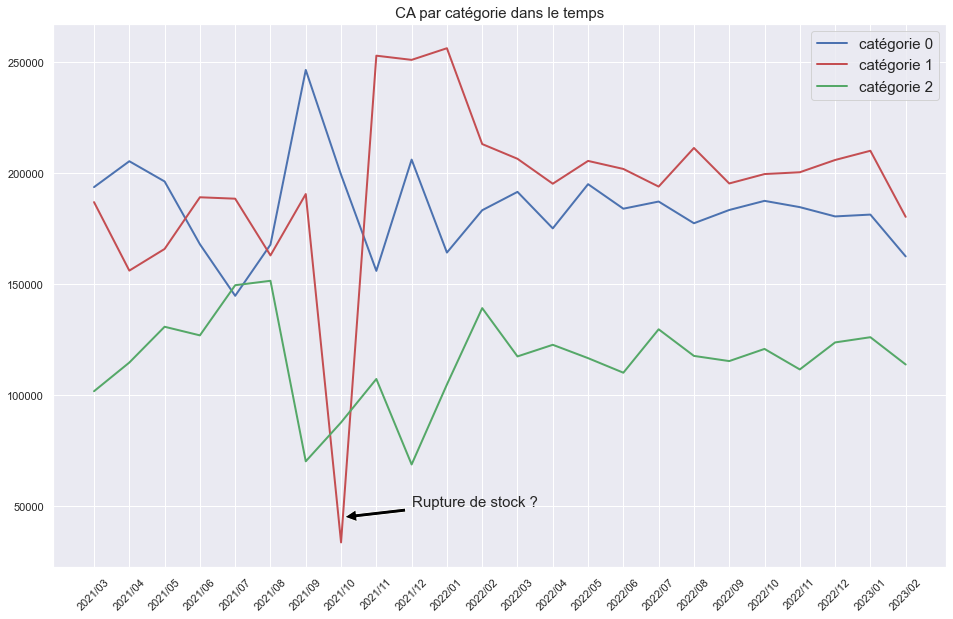

In [99]:
# Taille de la figure 
plt.figure(figsize=(16,10))
plt.grid(True)
plt.plot(Evolution0['Full'], Evolution0.price, 'b', linewidth = 2, label = 'catégorie 0')
plt.plot(Evolution1['Full'], Evolution1.price, 'r', linewidth = 2, label = 'catégorie 1')
plt.plot(Evolution2['Full'], Evolution2.price, 'g', linewidth = 2, label = 'catégorie 2')
plt.legend(prop = {'size' : 15})
plt.xticks(rotation = 45)
plt.title(" CA par catégorie dans le temps " , fontsize = 15 )
# Création d'une alerte sur le graph avec une fléche
plt.annotate('Rupture de stock ?' , xy = ('2021/10', 45000), xytext = ('2021/12' , 50000) , arrowprops = {'facecolor' : 'black' , 'shrink' : 0.05} , fontsize = 15 )

plt.show()

# Détails soucis CA catégorie dans le temps

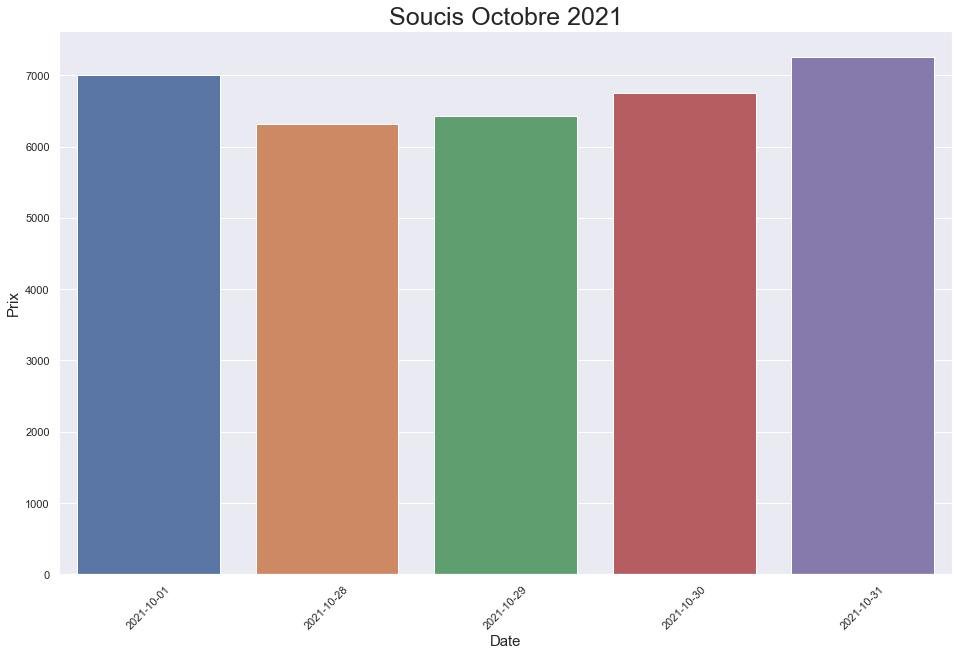

In [100]:
# Taille de la figure
plt.figure(figsize= (16,10))
#Utilisation de la librairie Seaborn pour un plot
sns.barplot(x = Soucis['annee_mois_jour'], y = Soucis['price'], palette = "deep" )
plt.xlabel('Date', fontsize = 15)
plt.ylabel('Prix', fontsize = 15)
plt.title('Soucis Octobre 2021', fontsize = 25)
plt.xticks(rotation= 45)
plt.show()

# <u>Zoom référence des catégories<u> :

### Catégorie 0

In [101]:
# Utilisation d'input + nouveau DF pour la categ 0
Nombre = int(input('combien de référence voulez vous afficher ? '))
Zoom0 = Zoom[Zoom.categ == 0] 
Zoom0 = Zoom0.groupby('id_prod' , as_index = False)
Zoom0 = Zoom0.price.sum()
Zoom0.sort_values('price' , ascending = False ).head(Nombre)

combien de référence voulez vous afficher ? 3


,id_prod,price
487,0_1441,23452.65
465,0_1421,23008.49
457,0_1414,22287.00


### Catégorie 1

In [102]:
# Utilisation d'input + nouveau DF pour la categ 1
Nombre = int(input('combien de référence voulez vous afficher ? '))
Zoom1 = Zoom[Zoom.categ == 1] 
Zoom1 = Zoom1.groupby('id_prod' , as_index = False)
Zoom1 = Zoom1.price.sum()
Zoom1.sort_values('price' , ascending = False ).head(Nombre)

combien de référence voulez vous afficher ? 3


,id_prod,price
327,1_395,54356.25
299,1_369,54025.48
349,1_414,51949.40


### Catégorie 2

In [103]:
# Utilisation d'input + nouveau DF pour la categ 2
Nombre = int(input('combien de référence voulez vous afficher ? '))
Zoom2 = Zoom[Zoom.categ == 2] 
Zoom2 = Zoom2.groupby('id_prod' , as_index = False)
Zoom2 = Zoom2.price.sum()
Zoom2.sort_values('price' , ascending = False ).head(Nombre)

combien de référence voulez vous afficher ? 3


,id_prod,price
67,2_159,94893.50
41,2_135,69334.95
16,2_112,65407.76


# <u>Contrôle<u> :

In [38]:
# Client particulier gros client ?
Liaison_2.groupby(['id_prod']).sum().max()

birth    4444555.0
price      94893.5
categ       2252.0
dtype: float64

# <u>Panier par client<u> :

In [104]:
# print du résultat du panier client avec un round()
print('Le panier client moyen est de', Panier_Client, '€')

Le panier client moyen est de 35 €


# <u>Les Tops et Flops des Ventes par produits<u> :

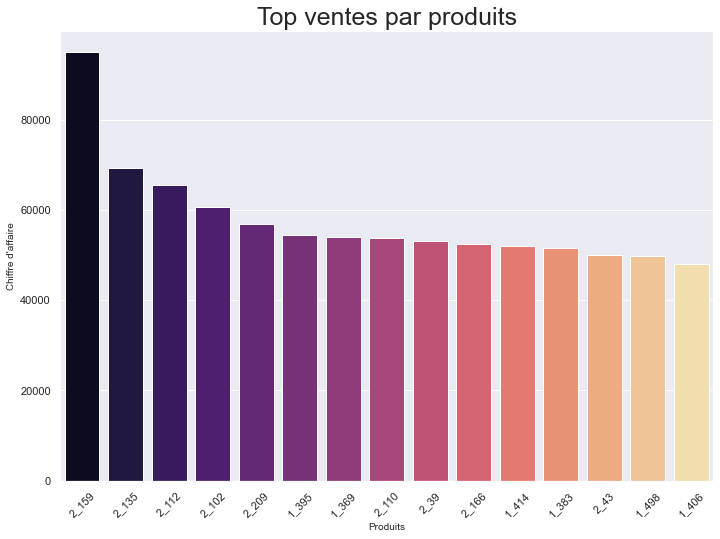

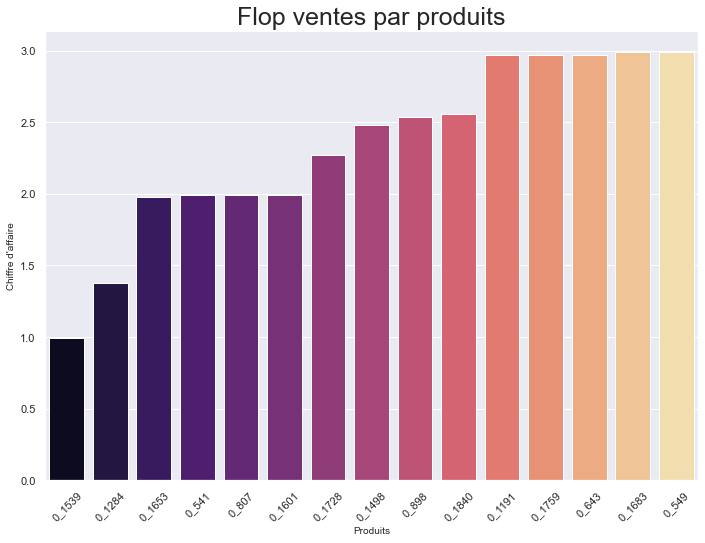

In [105]:
# Création DF top ventes avec données pour barplot en ascending False
Top_ventes = Top_ventes.sort_values(by = 'price' , ascending = False)
# Utilisation de la librairie Seaborn head(15)
sns.barplot(x = Top_ventes['id_prod'].head(15), y = Top_ventes.price, palette = 'magma')
plt.xlabel('Produits', fontsize = 10)
plt.ylabel("Chiffre d'affaire", fontsize = 10)
plt.title("Top ventes par produits", fontsize = 25)
plt.xticks(rotation = 45)
plt.show()

# Création DF top ventes avec données pour barplot en ascending True
Top_ventes = Top_ventes.sort_values(by = 'price' , ascending = True)
# Utilisation de la librairie Seaborn head(15)
sns.barplot(x = Top_ventes['id_prod'].head(15), y = Top_ventes.price, palette = 'magma')
plt.xlabel('Produits', fontsize = 10)
plt.ylabel("Chiffre d'affaire", fontsize = 10)
plt.title("Flop ventes par produits", fontsize = 25)
plt.xticks(rotation = 45)
plt.show()

# <u>Top Ventes produits par Catégorie<u> :

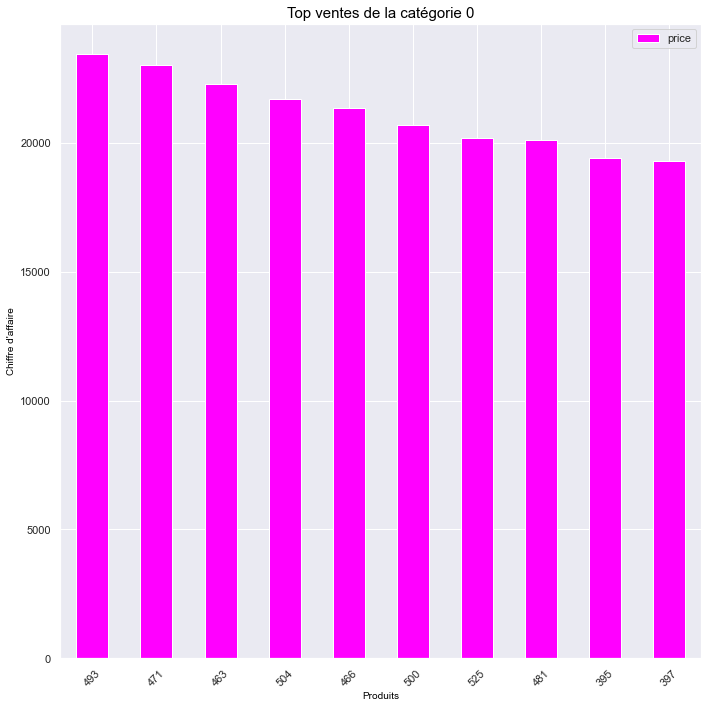

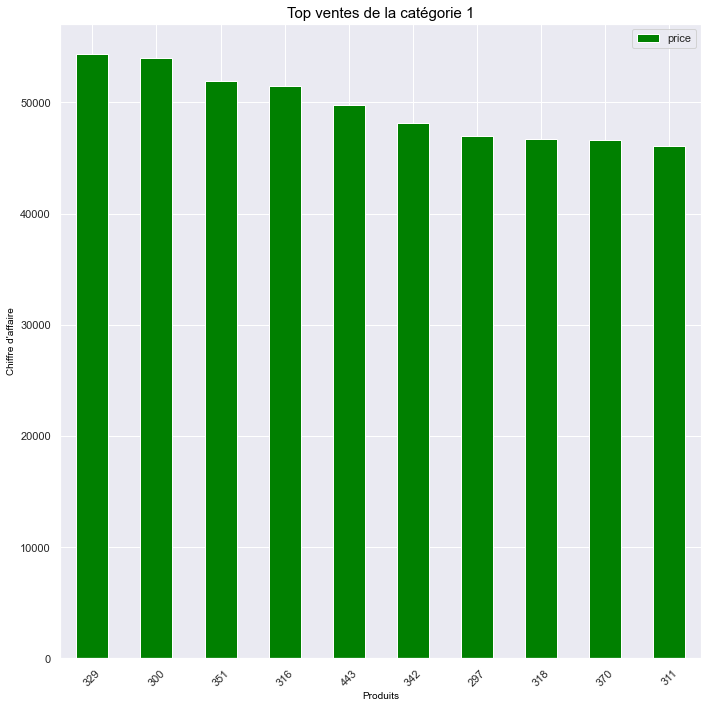

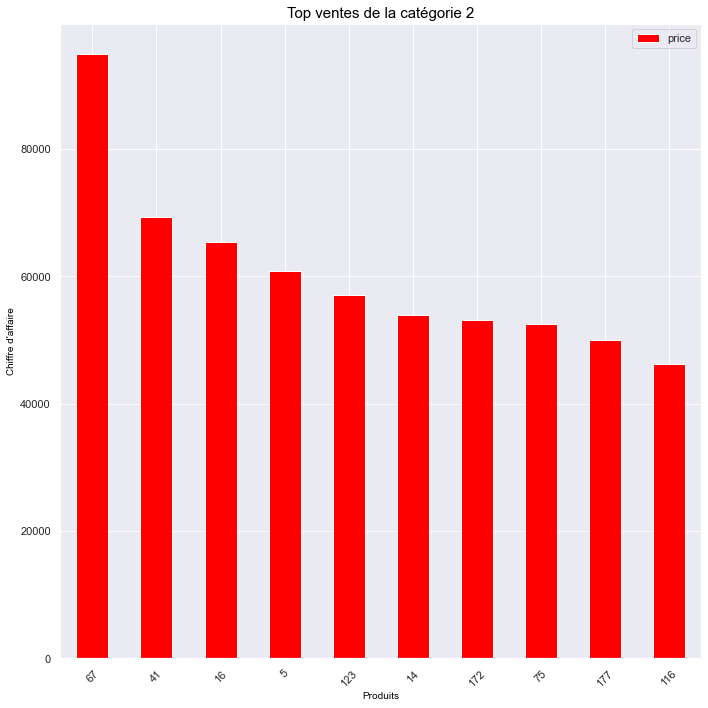

In [106]:
# Données pour la création du tableau Catégorie 0
Best_Categ_0.sort_values(['price'],ascending =[False]).head(10).plot(kind='bar',figsize = (10,10), color= 'magenta')
plt.xlabel('Produits', fontsize=10, color='Black')
plt.ylabel("Chiffre d'affaire", fontsize=10, color='Black')
plt.title("Top ventes de la catégorie 0", fontsize=15, color='Black')
plt.xticks(rotation= 45)
plt.tight_layout()

# Données pour la création du tableau Catégorie 1
Best_Categ_1.sort_values(['price'],ascending =[False]).head(10).plot(kind='bar',figsize = (10,10), color= 'green')
plt.xlabel('Produits', fontsize=10, color='Black')
plt.ylabel("Chiffre d'affaire", fontsize=10, color='Black')
plt.title("Top ventes de la catégorie 1", fontsize=15, color='Black')
plt.xticks(rotation= 45)
plt.tight_layout()

# Données pour la création du tableau Catégorie 2
Best_Categ_2.sort_values(['price'],ascending =[False]).head(10).plot(kind='bar',figsize = (10,10), color= 'red')
plt.xlabel('Produits', fontsize=10, color='Black')
plt.ylabel("Chiffre d'affaire", fontsize=10, color='Black')
plt.title("Top ventes de la catégorie 2", fontsize=15, color='Black')
plt.xticks(rotation= 45)
plt.tight_layout()

# <u>Vente par année de naissance des clients<u> :

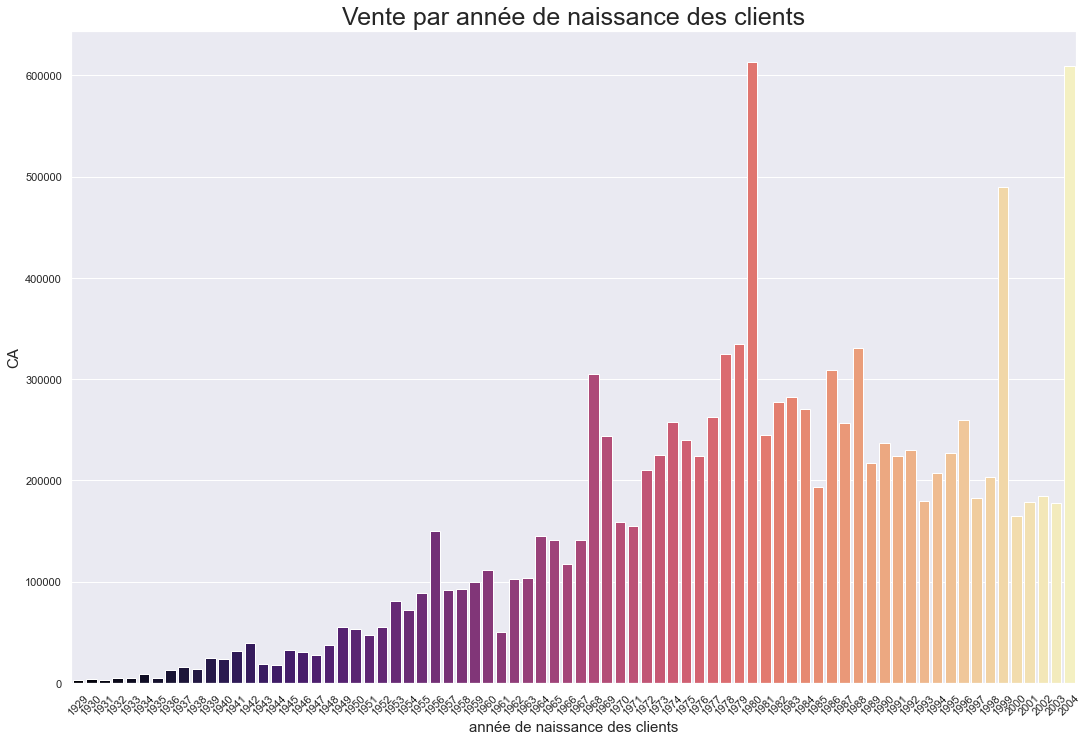

In [108]:
#graph
plt.figure(figsize= (18,12))
plt.grid(True)
sns.barplot(x = Liste_année_naissance.birth, y = Liste_année_naissance.price, palette = "magma" )
plt.xlabel('année de naissance des clients', fontsize = 15)
plt.ylabel('CA', fontsize = 15)
plt.title('Vente par année de naissance des clients', fontsize = 25)
plt.xticks(rotation= 45)
plt.show()

# <u>Top 10 des clients<u> :

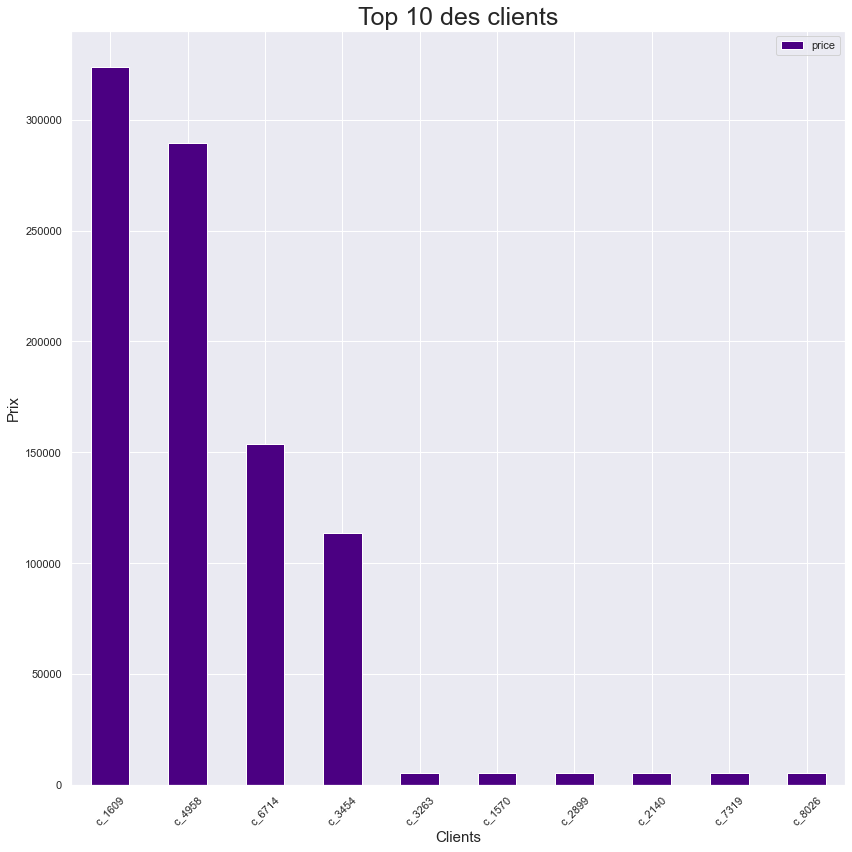

In [46]:
Top_clients_2 = Top_clients.sort_values(['price'] , ascending = [False]).head(10).plot(kind='bar',color = 'indigo', figsize = (12,12))
plt.xlabel('Clients', fontsize = 15)
plt.ylabel('Prix', fontsize = 15)
plt.title('Top 10 des clients', fontsize = 25)
plt.xticks(rotation= 45)
plt.grid(True)
plt.tight_layout()

# <u>Top 4 des meilleurs clients<u> :

### Visu des 4 meilleurs 

In [47]:
# verif
Top_clients.sort_values(['price'] , ascending = [False]).head(4)

,price
client_id,
c_1609,324033.35000
c_4958,289760.34000
c_6714,153669.28368
c_3454,113673.11184


In [48]:
# verif
Top4

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge
101814,c_4958,m,1999,1_251,2021-08-21 18:21:28.292701,s_78847,15.99,1.0,both
101815,c_4958,m,1999,1_251,2021-03-31 04:38:41.403411,s_13842,15.99,1.0,both
101816,c_4958,m,1999,1_251,2022-12-11 11:43:44.773397,s_310429,15.99,1.0,both
101817,c_4958,m,1999,1_251,2021-07-11 11:43:44.773397,s_60832,15.99,1.0,both
101818,c_4958,m,1999,1_251,2022-04-21 18:21:28.292701,s_197410,15.99,1.0,both
...,...,...,...,...,...,...,...,...,...
640808,c_3454,m,1969,0_978,2021-08-04 05:55:59.624826,s_71163,19.11,0.0,both
640809,c_3454,m,1969,0_978,2022-11-04 05:55:59.624826,s_292466,19.11,0.0,both
640810,c_3454,m,1969,1_226,2021-06-30 21:39:35.622109,s_56116,37.73,1.0,both
640811,c_3454,m,1969,1_440,2022-02-23 21:07:59.285798,s_169825,7.32,1.0,both


Ici on va calculer le chiffre d'affaire que rapportent les 4 gros clients :

In [109]:
round(Top4.price.sum(),2)
print('Les 4 plus gros clients rapportent',round(Top4.price.sum(),2), '€ à l entreprise' )

Les 4 plus gros clients rapportent 881136.09 € à l entreprise


Ici on va calculer le pourcentage qu'impacte le top 4 des clients :

In [110]:
print('Le top 4 corresponds à',top4_pourcentage , '% du chiffre d affaire')

Le top 4 corresponds à 7.43 % du chiffre d affaire


Maintenant qu'on a mis en avant les 4 gros client qui doivent être probablement des professionnels, il va falloir les supprimer pour ne pas ruiner les graphs et les chiffres.

In [111]:
# Suppression des données contenant les 4 gros clients
Liaison_2.drop(Liaison_2[Liaison_2['client_id'].str.contains('c_1609')].index,inplace = True)
Liaison_2.drop(Liaison_2[Liaison_2['client_id'].str.contains('c_4958')].index,inplace = True)
Liaison_2.drop(Liaison_2[Liaison_2['client_id'].str.contains('c_6714')].index,inplace = True)
Liaison_2.drop(Liaison_2[Liaison_2['client_id'].str.contains('c_3454')].index,inplace = True)

# <u>Âge sur le CA graph<u> :

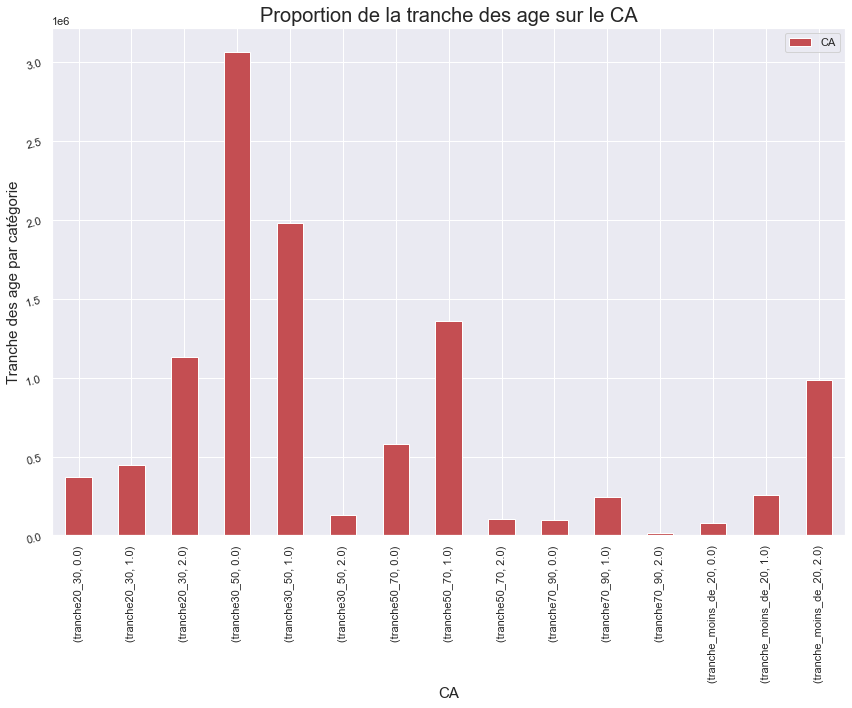

In [113]:
TEST.plot.bar(figsize=(12,10),color = Couleur)
plt.xlabel('CA', fontsize = 15)
plt.ylabel('Tranche des age par catégorie', fontsize = 15)
plt.title('Proportion de la tranche des age sur le CA', fontsize = 20)
plt.grid(True)
plt.yticks(rotation= 15)

plt.tight_layout()
plt.show()

# <u>Rapport de corrélation Prix par catégorie<u> :

In [114]:
# Choix des paramétres
XYZ = "categ" # qualitative
ZYX = "price" # quantitative

# Création DF pour ANOVA
Prix_sup_0 = Liaison_2[Liaison_2["price"] > 0] # On ne garde que les prix > 0

# Def ANOVA pour les calculs de la boucle
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
# Calcul pour le ANOVA    
round(eta_squared(Prix_sup_0 [XYZ],Prix_sup_0 [ZYX]),2)

# Print du résultat de l'ANOVA
print('Le rapport de corrélation pour le prix par catégorie est de',round(eta_squared(Prix_sup_0 [XYZ],Prix_sup_0 [ZYX]),2))

# Phrase explicative
print('Il y a donc une corrélation entre le prix et la catégorie')

Le rapport de corrélation pour le prix par catégorie est de 0.64
Il y a donc une corrélation entre le prix et la catégorie


# <u>Boxplot Âge par catégorie pour une corrélation<u> :

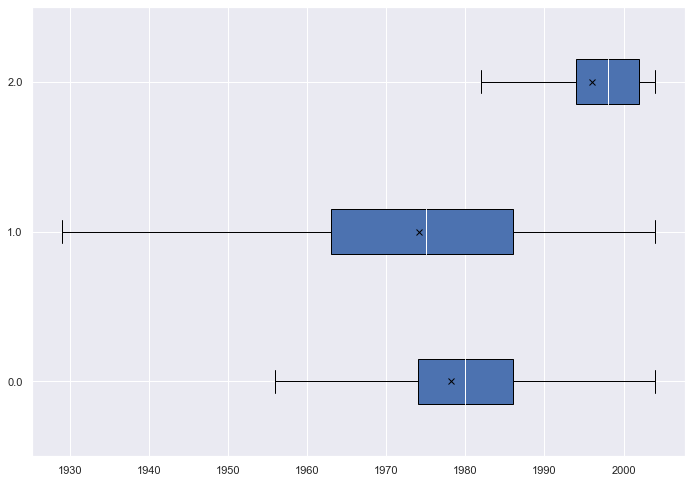

    On a la confirmation qu il y a une corrélation entre la catégorie et les annees de naissance.


In [115]:
# Age sur les catégories
X = "categ" # qualitative
Y = "birth" # quantitative

modalites = Prix_sup_0[X].unique()
groupes = []
# Création d'une boucle
for m in modalites:
    groupes.append(Prix_sup_0[Prix_sup_0[X]==m][Y])

# Propriétés graphiques     
medianprops = {'color':"white"}
meanprops = {'marker':'x', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

# Création du graphique
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
print('    On a la confirmation qu il y a une corrélation entre la catégorie et les annees de naissance.')

## <u>Boxplot Prix par catégorie pour une corrélation<u> :

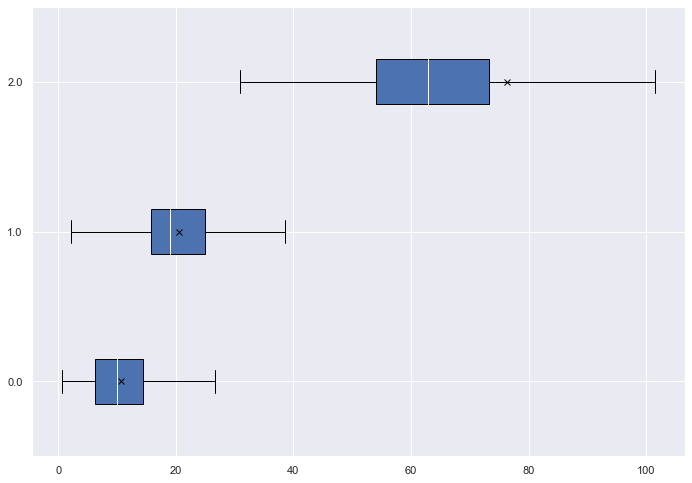

    On a la confirmation qu il y a une corrélation entre la catégorie et le prix.


In [116]:
modalites = Prix_sup_0[XYZ].unique()
groupes = []
# Création d'une boucle
for m in modalites:
    groupes.append(Prix_sup_0[Prix_sup_0[XYZ]==m][ZYX])

# Propriétés graphiques     
medianprops = {'color':"white"}
meanprops = {'marker':'x', 'markeredgecolor':'black',
            'markerfacecolor':'firebrick'}

# Création du graphique
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)
plt.show()
print('    On a la confirmation qu il y a une corrélation entre la catégorie et le prix.')

## <u>Boxplot tranche d'âge par prix pour une corrélation<u> :

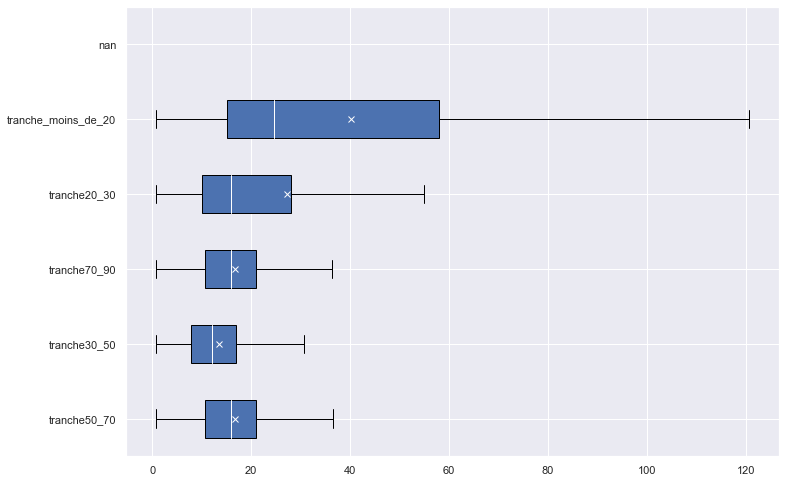

    On a la confirmation qu il y a une corrélation entre la tranche d âge et le prix.


In [117]:
# Tranche d'âge par prix
X = "tranche" # qualitative
Y = "price" # quantitative

modalites = Liaison_2_tranche[X].unique()
groupes = []
# Création d'une boucle
for m in modalites:
    groupes.append(Liaison_2_tranche[Liaison_2_tranche[X]==m][Y])

# Propriétés graphiques     
medianprops = {'color':"white"}
meanprops = {'marker':'x', 'markeredgecolor':'white',
            'markerfacecolor':'firebrick'}

# Création du graphique
plt.boxplot(groupes, labels=modalites, showfliers=False, medianprops=medianprops, 
            vert=False, patch_artist=True, showmeans=True, meanprops=meanprops)

plt.show()
print('    On a la confirmation qu il y a une corrélation entre la tranche d âge et le prix.')

# <u>Indice de Gini + Courbe de Lorenz<u> :

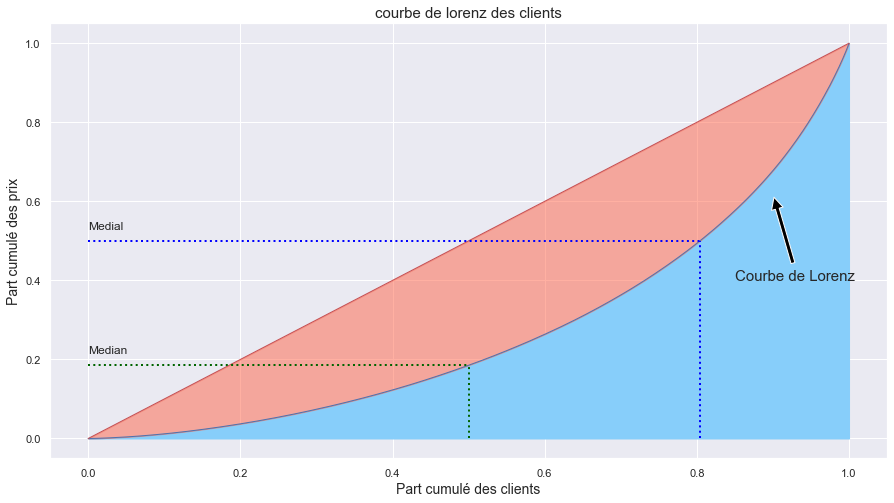

L indice de Gini est de -4.26 donc l inégalité est assez modérée


In [119]:
# Variable
lorenz = Liaison_2[['client_id', 'price']]

# Calcul de la courbe de lorenz
# Non droite = non égalitaire
lorenz_client = lorenz.groupby('client_id').count()
lorenz_client = lorenz_client.price.values
c = len(lorenz_client)
lorenz_client = np.cumsum(np.sort(lorenz_client)) / lorenz_client.sum()
lorenz_client = np.append([0], lorenz_client)

# Affichage de la courbe et de la droite xaxis
xm = np.linspace(0-1/c,1+1/c,c+1)
plt.figure(figsize= (15,8))
plt.grid(True)
plt.plot(xm,lorenz_client, "b", linewidth=1)
plt.fill_between(xm,lorenz_client,0,color='lightskyblue')
plt.plot([0,1], [0,1], "r", linewidth=1)
plt.fill_between(xm, xm, lorenz_client, color='tomato', alpha=0.5)
plt.xlabel('Part cumulé des clients', fontsize = 14)
plt.ylabel('Part cumulé des prix', fontsize = 14)
plt.annotate('Courbe de Lorenz', xy=(0.9, 0.62), xytext=(0.85, 0.4), 
             arrowprops={'facecolor':'black', 'shrink':0.05}, fontsize = 15 )

# Calcul et visu de la mediane
medianc = lorenz_client[int(round(len(lorenz_client)) / 2)]
plt.plot([0.5, 0.5], [0, medianc], 'darkgreen', linestyle=':', linewidth=2, label="Median")
plt.plot([0, 0.5], [medianc, medianc], 'darkgreen', linestyle=':', linewidth=2)
plt.annotate('Median', xy=(0, 0.5), xytext=(0, (medianc + 0.03)),  fontsize = 12 )

# Calcul et visu de la médiale
medialc = len(lorenz_client[lorenz_client <= 0.5]) / len(lorenz_client)
plt.plot([0, medialc], [0.5, 0.5], 'blue', linestyle=':', linewidth=2, label="Medial")
plt.plot([medialc, medialc], [0, 0.5], 'blue', linestyle=':', linewidth=2)
plt.annotate('Medial', xy=(0, 0.5), xytext=(0, 0.53),  fontsize = 12 )

plt.title('courbe de lorenz des clients', fontsize = 15)
plt.show()

# Affichage de l'indice GINI

AUC = (lorenz_client.sum() -lorenz_client[-1]/2 -lorenz_client[0]/2)/n # Surface sous la courbe de Lorenz. 
S = medianc - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
print('L indice de Gini est de', round((gini),2), 'donc l inégalité est assez modérée')

# <u>Corrélation Khi-2<u> :

### Proportions Hommes / Femmes par catégorie

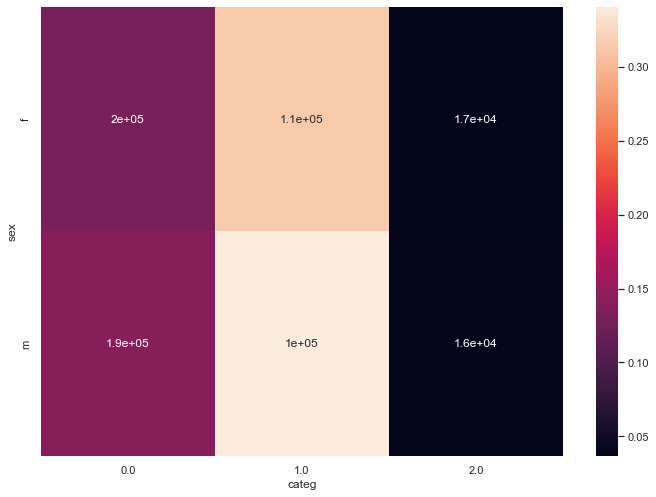

In [120]:
# Pas de corrélation Hommes / Femmes
# création des axes X et Y pour le KHI-2
X1 = "sex"
Y1 = "categ"

cont = Liaison_2[[X1,Y1]].pivot_table(index=X1,columns=Y1,aggfunc=len,margins=True,margins_name="total")

tX1 = cont.loc[:,["total"]]
tY1 = cont.loc[["total"],:]
n = len(Liaison_2)
indep = tX1.dot(tY1) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
X1i_n = measure.sum().sum()
table = measure/X1i_n
sns.heatmap(table.iloc[:-1,:-1],annot=c.iloc[:-1,:-1])
plt.show()

# <u>Tranche d'âge par catégorie<u> :

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'tranche20_30'),
  Text(0, 1.5, 'tranche30_50'),
  Text(0, 2.5, 'tranche50_70'),
  Text(0, 3.5, 'tranche70_90'),
  Text(0, 4.5, 'tranche_moins_de_20')])

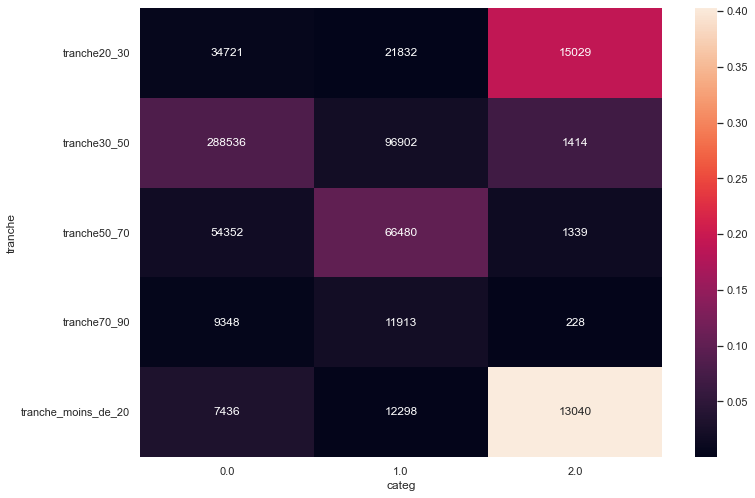

In [121]:
# Tranche d'âge par catégorie

# création des axes X et Y pour le KHI-2
X1 = "tranche"
Y1 = "categ"


cont = Liaison_2_tranche[[X1,Y1]].pivot_table(index=X1,columns=Y1,aggfunc=len,margins=True,margins_name="total")

tX1 = cont.loc[:,["total"]]
tY1 = cont.loc[["total"],:]
n = len(Liaison_2_tranche)
indep = tX1.dot(tY1) / n

c = cont.fillna(0) # On remplace les valeurs nulles par 0
measure = (c-indep)**2/indep
X1i_n = measure.sum().sum()
table = measure/X1i_n
sns.heatmap(table.iloc[:-1,:-1],annot=cont.iloc[:-1,:-1],fmt="d")
plt.yticks(rotation=360)

# <u>__Interprétation du KHI-2 Tranche d'âge par catégorie__<u>

#### Les Moins de 20 ans sont de gros consommateurs de la catégorie 2

# <u>Probabilité qu’un client achète la référence 0_525 sachant qu’il a acheté la référence 2_159<u> :

### visu des références

In [63]:
# Visu de l'id_prod 0_525
Liaison_2[Liaison_2.id_prod == "0_525"]

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge,tranche
46,c_4410,f,1967,0_525,2021-12-01 07:36:26.671688,s_127714,2.99,0.0,both,tranche50_70
650,c_4389,m,1984,0_525,2022-02-26 04:43:32.110005,s_171008,2.99,0.0,both,tranche30_50
859,c_5019,f,1977,0_525,2021-12-17 03:00:11.554987,s_135533,2.99,0.0,both,tranche30_50
2722,c_5633,f,1986,0_525,2022-04-18 15:33:54.341350,s_195917,2.99,0.0,both,tranche30_50
3186,c_3424,m,2003,0_525,2022-05-24 18:34:21.048378,s_213433,2.99,0.0,both,tranche_moins_de_20
...,...,...,...,...,...,...,...,...,...,...
673469,c_2705,m,1979,0_525,2021-06-04 20:06:05.667769,s_44084,2.99,0.0,both,tranche30_50
674776,c_1279,m,1964,0_525,2022-05-13 20:15:44.409054,s_208009,2.99,0.0,both,tranche50_70
675806,c_2886,m,1970,0_525,2021-12-27 03:57:45.523720,s_140639,2.99,0.0,both,tranche30_50
676715,c_697,f,1960,0_525,2022-10-05 00:03:59.608012,s_277896,2.99,0.0,both,tranche50_70


In [64]:
# Visu de l'id_prod 2_159
Liaison_2[Liaison_2.id_prod == "2_159"]

,client_id,sex,birth,id_prod,date,session_id,price,categ,_merge,tranche
28,c_4410,f,1967,2_159,2021-12-01 07:36:25.671688,s_127714,145.99,2.0,both,tranche50_70
625,c_4389,m,1984,2_159,2022-02-26 04:43:31.110005,s_171008,145.99,2.0,both,tranche30_50
832,c_5019,f,1977,2_159,2021-12-17 03:00:10.554987,s_135533,145.99,2.0,both,tranche30_50
2695,c_5633,f,1986,2_159,2022-04-18 15:33:53.341350,s_195917,145.99,2.0,both,tranche30_50
3183,c_3424,m,2003,2_159,2022-05-24 18:34:20.048378,s_213433,145.99,2.0,both,tranche_moins_de_20
...,...,...,...,...,...,...,...,...,...,...
673452,c_2705,m,1979,2_159,2021-06-04 20:06:04.667769,s_44084,145.99,2.0,both,tranche30_50
674699,c_1279,m,1964,2_159,2022-05-13 20:15:43.409054,s_208009,145.99,2.0,both,tranche50_70
675779,c_2886,m,1970,2_159,2021-12-27 03:57:44.523720,s_140639,145.99,2.0,both,tranche30_50
676673,c_697,f,1960,2_159,2022-10-05 00:03:58.608012,s_277896,145.99,2.0,both,tranche50_70


In [65]:
# Description de la liste PROBA en incluant tout
PROBA.describe(include = "all")

,client_id,sex_x,birth_x,id_prod_x,date_x,session_id_x,price_x,categ_x,_merge_x,tranche_x,sex_y,birth_y,id_prod_y,date_y,session_id_y,price_y,categ_y,_merge_y,tranche_y
count,457499,457499,457499.000000,457499,457499,457499,457499.000000,457499.000000,457499,425143,457499,457499.000000,457499,457499,457499,4.574990e+05,457499.0,457499,425143
unique,530,2,NaN,2821,111297,53043,NaN,NaN,2,5,2,NaN,1,650,649,NaN,NaN,1,5
top,c_1609,m,NaN,1_498,2023-01-07 22:34:50.998939,s_240291,NaN,NaN,both,tranche30_50,m,NaN,2_159,2021-11-26 22:17:46.483718,s_338704,NaN,NaN,both,tranche30_50
freq,254880,322704,NaN,1372,11,121,NaN,NaN,457398,303071,322704,NaN,457499,25488,25488,NaN,NaN,457499,303071
mean,NaN,NaN,1977.757643,NaN,NaN,NaN,16.085234,0.355607,NaN,NaN,NaN,1977.757643,NaN,NaN,NaN,1.459900e+02,2.0,NaN,NaN
std,NaN,NaN,7.981770,NaN,NaN,NaN,16.901662,0.554013,NaN,NaN,NaN,7.981770,NaN,NaN,NaN,6.752153e-10,0.0,NaN,NaN
min,NaN,NaN,1929.000000,NaN,NaN,NaN,0.620000,0.000000,NaN,NaN,NaN,1929.000000,NaN,NaN,NaN,1.459900e+02,2.0,NaN,NaN
25%,NaN,NaN,1969.000000,NaN,NaN,NaN,7.990000,0.000000,NaN,NaN,NaN,1969.000000,NaN,NaN,NaN,1.459900e+02,2.0,NaN,NaN
50%,NaN,NaN,1980.000000,NaN,NaN,NaN,12.990000,0.000000,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN,1.459900e+02,2.0,NaN,NaN
75%,NaN,NaN,1980.000000,NaN,NaN,NaN,18.110000,1.000000,NaN,NaN,NaN,1980.000000,NaN,NaN,NaN,1.459900e+02,2.0,NaN,NaN


Objets uniques pour les références :

In [66]:
# nunique pour la ref 2_159
print('Le nombre des objets uniques pour 2_159 est de',XOR)

Le nombre des objets uniques pour 2_159 est de 530


In [67]:
# nunique pour la ref 0_525
print('Le nombre des objets uniques pour 0_525 est de',YOR)

Le nombre des objets uniques pour 0_525 est de 459


### Résultat probabilité

In [68]:
# Print du résultat de probabilité des références 0_525 et 2_159
print('La probabilité qu’un client achète la référence 0_525 en ayant acheté la référence 2_159 est de',XX, '%')

La probabilité qu’un client achète la référence 0_525 en ayant acheté la référence 2_159 est de 86.6 %


### Taux de corrélation Pearson

+1 - Complete positive correlation

+0.8 - Strong positive correlation

+0.6 - Moderate positive correlation

0 - no correlation whatsoever

-0.6 - Moderate negative correlation

-0.8 - Strong negative correlation






-1 - Complete negative correlation

Pearsons correlation: 0.669
0.69 R²


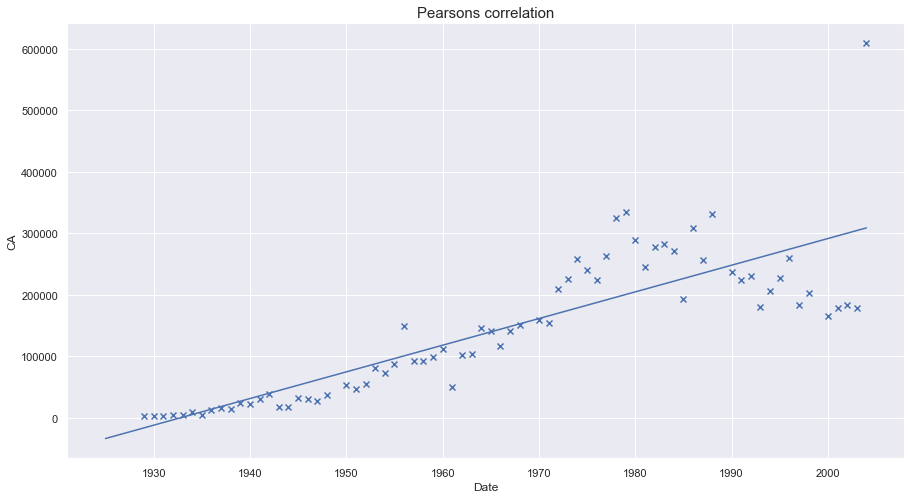

In [122]:
from scipy.stats import pearsonr

index_with_nan = Liaison_2.index[Liaison_2.isnull().any(axis=1)]

Liaison_2.drop(index_with_nan,0, inplace=True)

# Convert dataframe into series
list1 = Liaison_2['categ']
list2 = Liaison_2['price']
  
# Apply the pearsonr()
corr, _ = pearsonr(list1, list2)
print('Pearsons correlation: %.3f' % corr)

pearson_corre = Liaison_2[['birth', 'price']]
pearsonsum = pearson_corre.groupby('birth', as_index = False)
pearsonsum = pearsonsum.price.sum()

Y = pearsonsum['price']
X = pearsonsum[['birth']]
X = X.copy() # On modifiera X, on en crée donc une copie
X['intercept'] = 1.
result = sm.OLS(Y, X).fit() # OLS = Ordinary Least Square (Moindres Carrés Ordinaire)
a,b = result.params['birth'],result.params['intercept']

x = pearsonsum.birth
y = pearsonsum.price
pearson = scipy.stats.linregress(x, y)
print(round((pearson.rvalue*pearson.rvalue),2), 'R²')

fig, ax = plt.subplots(figsize= (15,8))
ax.scatter(pearsonsum.birth, pearsonsum.price, marker='x')
plt.plot(np.arange(1925,2005),[a*x+b for x in np.arange(1925,2005)])
ax.set_ylabel('CA')
ax.set_xlabel('Date')
plt.title('Pearsons correlation', fontsize = 15)
plt.show()

# <u>Moyenne Mobile<u> :

### Visu du graphique Evolution du CA + moyenne mobile

Graph de 2021/03 à 2023/02 avec le chiffre d'affaire + la moyenne mobile sur 6 mois et la moyenne mobile sur 1 an

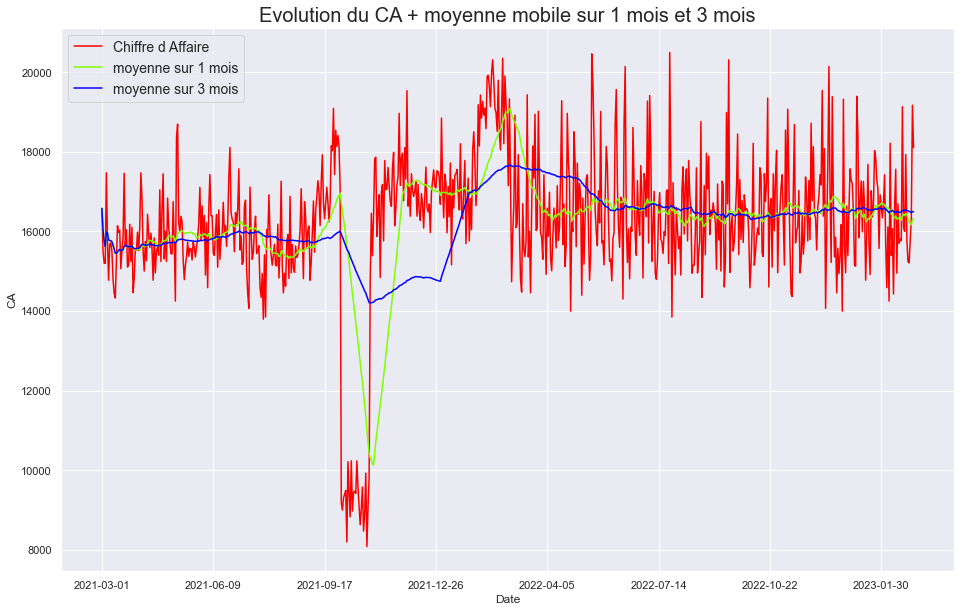

In [123]:
plt.figure(figsize = (16,10))
moyenne_mobile['price'].plot(color = 'Red', label = 'Chiffre d Affaire')
moyenne_mobile['1_mois'].plot(color = 'Chartreuse', label = 'moyenne sur 1 mois')
moyenne_mobile['3_mois'].plot(color = 'Blue', label = 'moyenne sur 3 mois')
plt.legend(prop={ 'size' : 14})
plt.title ('Evolution du CA + moyenne mobile sur 1 mois et 3 mois', fontsize = 20)
plt.grid(True)
plt.xlabel("Date")
plt.ylabel("CA")
plt.show()

# <u>Moyennes<u> :

### Graphique l'année sur le prix

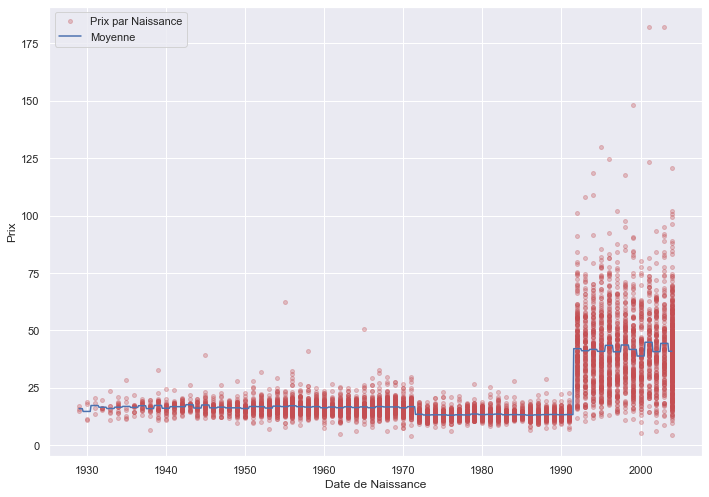

In [124]:
#first generate some datapoint for a randomly sampled noisy sinewave
x = Liaison_2_moyenne.birth
noise = np.random.normal(scale=0.3,size=len(x))
y = Liaison_2_moyenne.price

#plot the data
plt.plot(x,y,'ro',alpha=0.3,ms=4,label='Prix par Naissance')
plt.xlabel('Date de Naissance')
plt.ylabel('Prix')

#define a moving average function
def moving_average(x,y,step_size=.1,bin_size=1):
    bin_centers  = np.arange(np.min(x),np.max(x)-0.5*step_size,step_size)+0.5*step_size
    bin_avg = np.zeros(len(bin_centers))

    for index in range(0,len(bin_centers)):
        bin_center = bin_centers[index]
        items_in_bin = y[(x>(bin_center-bin_size*0.5) ) & (x<(bin_center+bin_size*0.5))]
        bin_avg[index] = np.mean(items_in_bin)

    return bin_centers,bin_avg


#plot the moving average
bins, average = moving_average(x,y)
plt.plot(bins, average,label='Moyenne')
plt.legend()

plt.show()

# TEST DE SHAPIRO

- Pvalue corresponds au niveau de corrélation

### CATEG_0

In [125]:
shapiro_0 = Liaison_2[['categ', 'birth']]           
n,random_state = 1000,1
shapiro_0 = shapiro_0[shapiro_0.categ == 0]
scipy.stats.shapiro(list(shapiro_0.sample(n,random_state=random_state).birth))

ShapiroResult(statistic=0.9377966523170471, pvalue=5.084139942378168e-20)

pvalue quasi nulle, il suit une loi log normale à cause d'une patte plus long que l'autre

<AxesSubplot:>

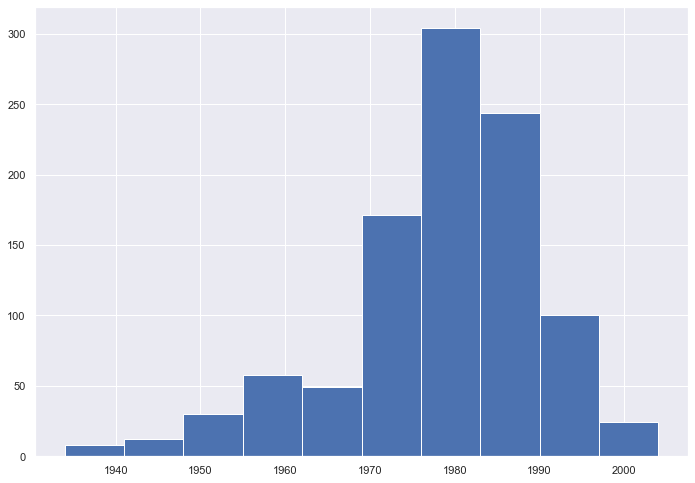

In [126]:
shapiro_0.sample(n,random_state=random_state).birth.hist()

### Categ_1

In [127]:
shapiro_1 = Liaison_2[['categ', 'birth']]           
n,random_state = 1000,1
shapiro_1 = shapiro_1[shapiro_1.categ == 1]
scipy.stats.shapiro(list(shapiro_1.sample(n,random_state=random_state).birth))

ShapiroResult(statistic=0.9885507822036743, pvalue=4.894757239526371e-07)

pvalue quasi nulle, il suit une loi log normale à cause d'une patte plus long que l'autre

<AxesSubplot:>

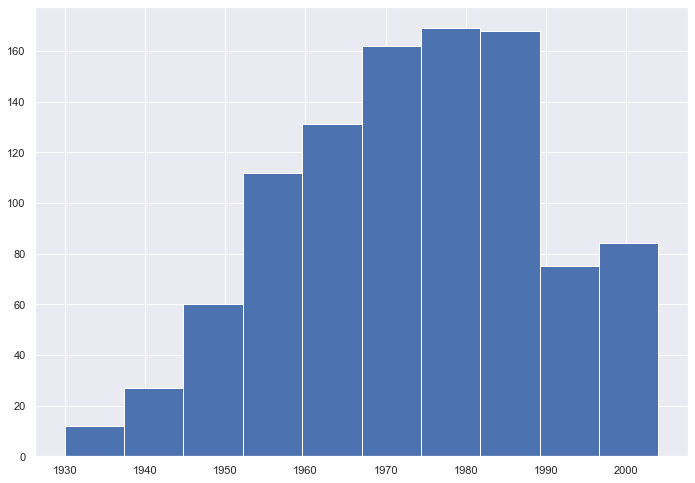

In [128]:
shapiro_1.sample(n,random_state=random_state).birth.hist()

### Categ_2

In [129]:
shapiro_2 = Liaison_2[['categ', 'birth']]           
n,random_state = 1000,1
shapiro_2 = shapiro_2[shapiro_2.categ == 2]
scipy.stats.shapiro(list(shapiro_2.sample(n,random_state=random_state).birth))

ShapiroResult(statistic=0.6862755417823792, pvalue=1.7759888581037013e-39)

pvalue quasi nulle, il suit une loi log normale à cause d'une patte plus long que l'autre

<AxesSubplot:>

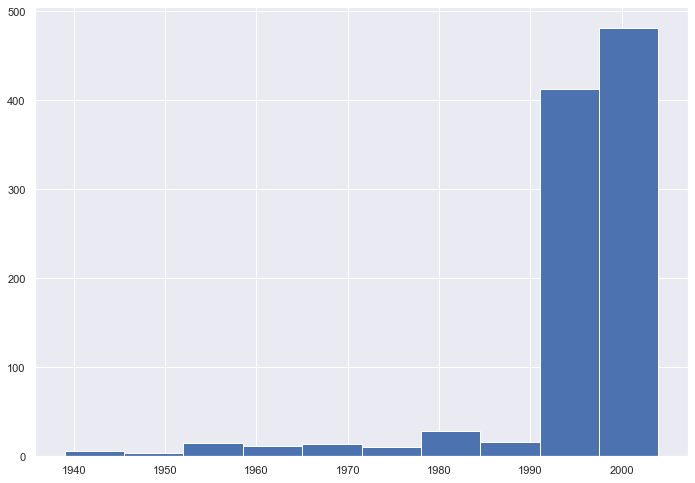

In [130]:
shapiro_2.sample(n,random_state=random_state).birth.hist()

### CATEG_FULL

In [131]:
shapiro = Liaison_2[['categ', 'birth']]           
n,random_state = 1000,1
scipy.stats.shapiro(list(shapiro.sample(n,random_state=random_state).birth))

ShapiroResult(statistic=0.961223304271698, pvalue=1.218454777042943e-15)

pvalue quasi nulle, il suit une loi log normale à cause d'une patte plus long que l'autre

<AxesSubplot:>

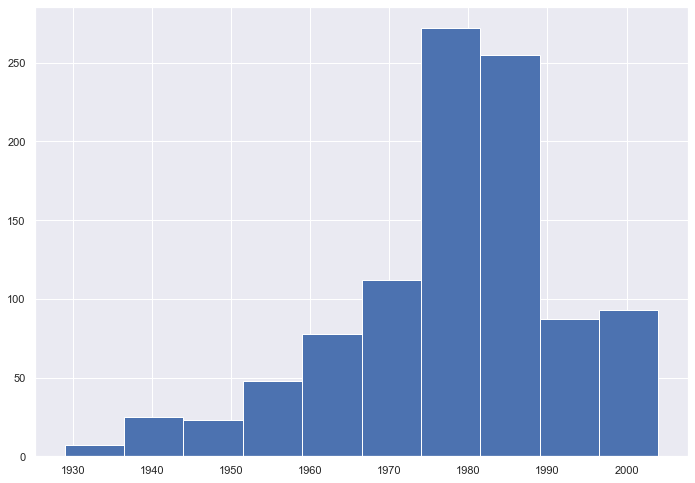

In [132]:
shapiro.sample(n,random_state=random_state).birth.hist()

In [133]:
# Choix des paramétres
XYZ = "categ" # qualitative
ZYX = "birth" # quantitative

# Création DF pour ANOVA
Prix_sup_0 = Liaison_2[Liaison_2["birth"] > 0] # On ne garde que les prix > 0

# Def ANOVA pour les calculs de la boucle
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
# Calcul pour le ANOVA    
round(eta_squared(Prix_sup_0 [XYZ],Prix_sup_0 [ZYX]),2)

# Print du résultat de l'ANOVA
print('Le rapport de corrélation pour l année de naissance par catégorie est de',round(eta_squared(Prix_sup_0 [XYZ],Prix_sup_0 [ZYX]),2))

# Phrase explicative
print('Il y a donc une corrélation entre l année de naissance et la catégorie')

Le rapport de corrélation pour l année de naissance par catégorie est de 0.11
Il y a donc une corrélation entre l année de naissance et la catégorie


# Test de T (Student) :

- N correponds à
- Mean corresponds à la moyenne 
- SD corresponds à la déviation Standard
- SE corresponds à 
- 95% conf. corresponds à l'intervalle de confiance à 95%
- Interval corresponds à l'interval total

### Par sexe 

In [134]:
"""summary, results = rp.ttest(group1= Liaison_2['price'][Liaison_2['sex'] == 'm'], group1_name= "Male",
                            group2= Liaison_2['price'][Liaison_2['sex'] == 'f'], group2_name= "Female")
print(summary)"""

'summary, results = rp.ttest(group1= Liaison_2[\'price\'][Liaison_2[\'sex\'] == \'m\'], group1_name= "Male",\n                            group2= Liaison_2[\'price\'][Liaison_2[\'sex\'] == \'f\'], group2_name= "Female")\nprint(summary)'

# Chiffre d'Affaire sur le Sexe :

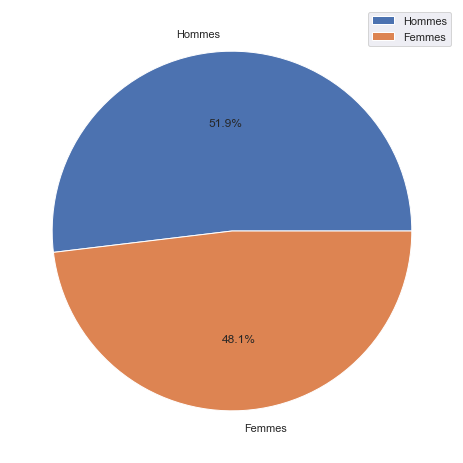

In [135]:
CA_Sex = Liaison_2[['price', 'sex']]
CA_Sex = CA_Sex.groupby('sex', as_index = False).sum()

x = CA_Sex.price
plt.pie(x, labels = ['Hommes', 'Femmes'], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
plt.legend()
plt.show()

### Chiffre d'affaire sur le sexe test de corrélation :

In [136]:
# Choix des paramétres
XYZ = "sex" # qualitative
ZYX = "price" # quantitative

# Création DF pour ANOVA
Prix_sup_01 = CA_Sex[CA_Sex["price"] > 0] # On ne garde que les prix > 0

# Def ANOVA pour les calculs de la boucle
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
# Calcul pour le ANOVA    
round(eta_squared(Prix_sup_01 [XYZ],Prix_sup_01 [ZYX]),2)
"""
# Print du résultat de l'ANOVA
print('Le rapport de corrélation pour le prix par catégorie est de',round(eta_squared(Prix_sup_0 [XYZ],Prix_sup_0 [ZYX]),2))

# Phrase explicative
print('Il y a pas de corrélation entre le sexe et le prix')
"""

"\n# Print du résultat de l'ANOVA\nprint('Le rapport de corrélation pour le prix par catégorie est de',round(eta_squared(Prix_sup_0 [XYZ],Prix_sup_0 [ZYX]),2))\n\n# Phrase explicative\nprint('Il y a pas de corrélation entre le sexe et le prix')\n"

# CA par tranche d'âge pie :

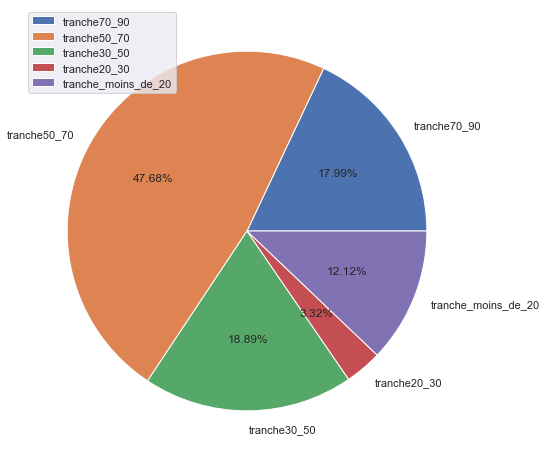

In [137]:
CA_tranche = Liaison_2_tranche
CA_tranche = CA_tranche.groupby('tranche', as_index = False).sum()

x = CA_tranche.price
plt.pie(x, labels = ['tranche70_90', 'tranche50_70', 'tranche30_50','tranche20_30','tranche_moins_de_20'  ], normalize = True, autopct = lambda x: str(round(x, 2)) + '%')
plt.legend()
plt.show()

### CA par tranche d'âge test de corrélation :

In [86]:
# Choix des paramétres
XYZ = "tranche" # qualitative
ZYX = "price" # quantitative

# Création DF pour ANOVA
Prix_sup_01 = CA_tranche[CA_tranche["price"] > 0] # On ne garde que les prix > 0

# Def ANOVA pour les calculs de la boucle
def eta_squared(x,y):
    moyenne_y = y.mean()
    classes = []
    for classe in x.unique():
        yi_classe = y[x==classe]
        classes.append({'ni': len(yi_classe),
                        'moyenne_classe': yi_classe.mean()})
    SCT = sum([(yj-moyenne_y)**2 for yj in y])
    SCE = sum([c['ni']*(c['moyenne_classe']-moyenne_y)**2 for c in classes])
    return SCE/SCT
# Calcul pour le ANOVA    
round(eta_squared(Prix_sup_01 [XYZ],Prix_sup_01 [ZYX]),2)

"""
# Print du résultat de l'ANOVA
print('Le rapport de corrélation pour le prix par catégorie est de',round(eta_squared(Prix_sup_01 [XYZ],Prix_sup_01 [ZYX]),2))

# Phrase explicative
print('Il y a pas de corrélation entre la tranche et le prix')
"""

"\n# Print du résultat de l'ANOVA\nprint('Le rapport de corrélation pour le prix par catégorie est de',round(eta_squared(Prix_sup_01 [XYZ],Prix_sup_01 [ZYX]),2))\n\n# Phrase explicative\nprint('Il y a pas de corrélation entre la tranche et le prix')\n"